In [ ]:

import os
import numpy as np
import pandas as pd
import mlcroissant as mlc
from skimage.io import imread

from croissant_functions import clear_cache, get_images_urls
from API4AI_functions import mask_from_xpl_image, kmeans_segmentation, plot_kmeans_segmentation_results, plot_kmeans_segmentation_results_zoomed, plot_test_image


# Specify croissant download directory and clear cache:
directory = "C:\\Users\\itaga.NERC\\.cache\\croissant\\download"
clear_cache (directory)

# Get image urls from file:
f = "https://resources.bgs.ac.uk/petrologyThinSectionsHighResDemo/croissant.json"
ds = mlc.Dataset(f)
record_set = ds.metadata.record_sets
ppl_urls, xpl_urls, sample_ids = get_images_urls (ds, record_set)


  -  [Metadata(bgs-sample-thin-sections-api4ai)] Property "https://schema.org/datePublished" is recommended, but does not exist.


Deleted: C:\Users\itaga.NERC\.cache\croissant\download\croissant-b5338cdf099f3695325c1f6307434e190699524c4a119950028b78adb887df40
CACHE CLEARED


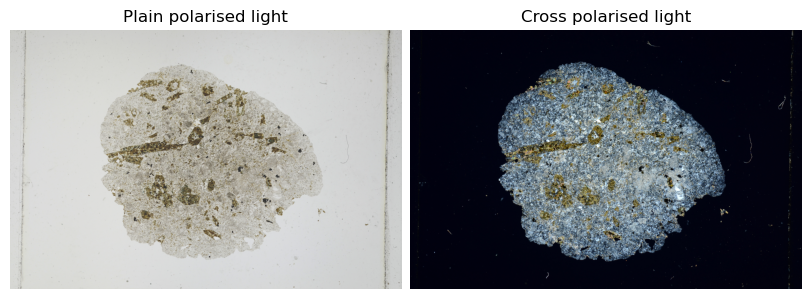

In [13]:
# Choose test image (there are 6 test images in the file):
img_num = 3

# Get sample id:
sample_id = sample_ids[img_num]

# Open plain (ppl) and cross (xpl) polarised light images in color, and xpl in grayscale:
ppl_img = imread (ppl_urls[img_num])
xpl_img = imread (xpl_urls[img_num])
xpl_img_gray = imread (xpl_urls[img_num], as_gray=True)

# Plot test image:
plot_test_image (ppl_img, xpl_img)

In [14]:
# Get mask to separate sample from background/box:
ppl_masked, xpl_masked, mask = mask_from_xpl_image (xpl_img_gray, xpl_img, ppl_img)

In [15]:
# Use KMeans for some rough segmentation: 
# segmented_img is a "reconstruction" of the original image, assigning each 
# cluster the color closer to the original one. clust_img just assigns each
# pixel a cluster label. Clust_percs and clust_labels are the percentage
# of pixels in each cluster and a string label for each one.
segmented_img, clust_img, clust_percs, clust_labels = kmeans_segmentation (xpl_masked, num_clusters=8)

Percentage of pixels in each cluster:
Cluster 0 = 68.1 %
Cluster 1 = 2.1 %
Cluster 2 = 6.3 %
Cluster 3 = 6.2 %
Cluster 4 = 5.7 %
Cluster 5 = 1.6 %
Cluster 6 = 4.3 %
Cluster 7 = 5.7 %


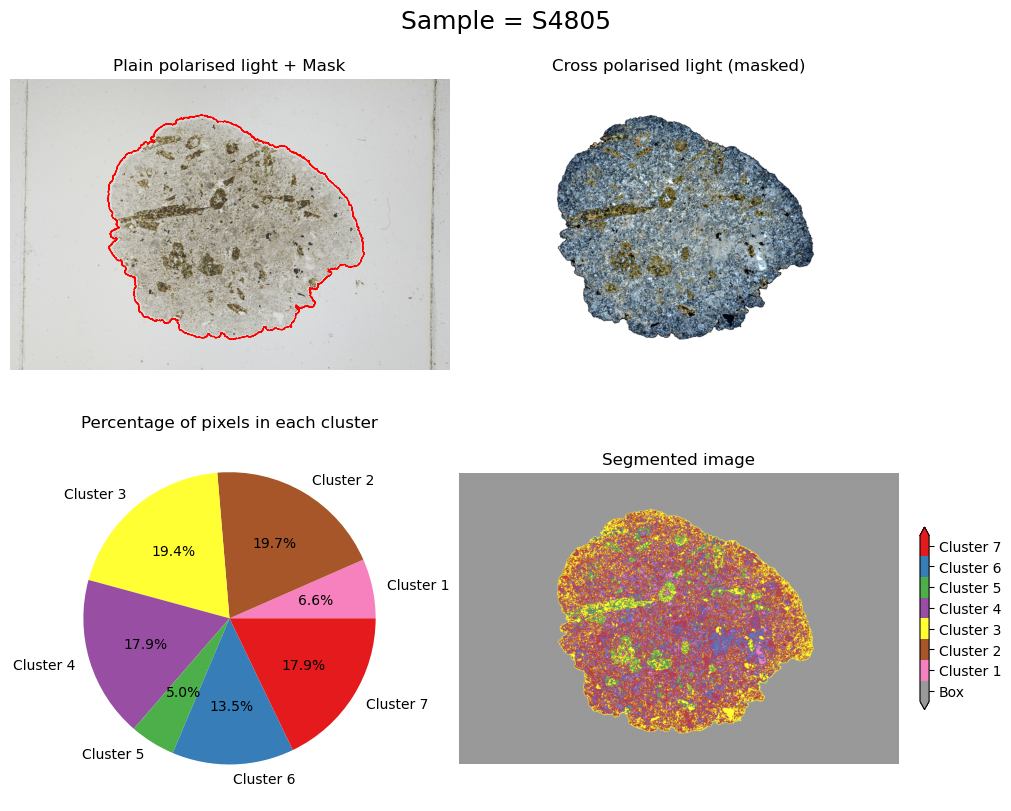

In [16]:
# Plot results:
plot_kmeans_segmentation_results (mask, xpl_masked, ppl_img, clust_img, 
                                  clust_percs, clust_labels, sample_id)

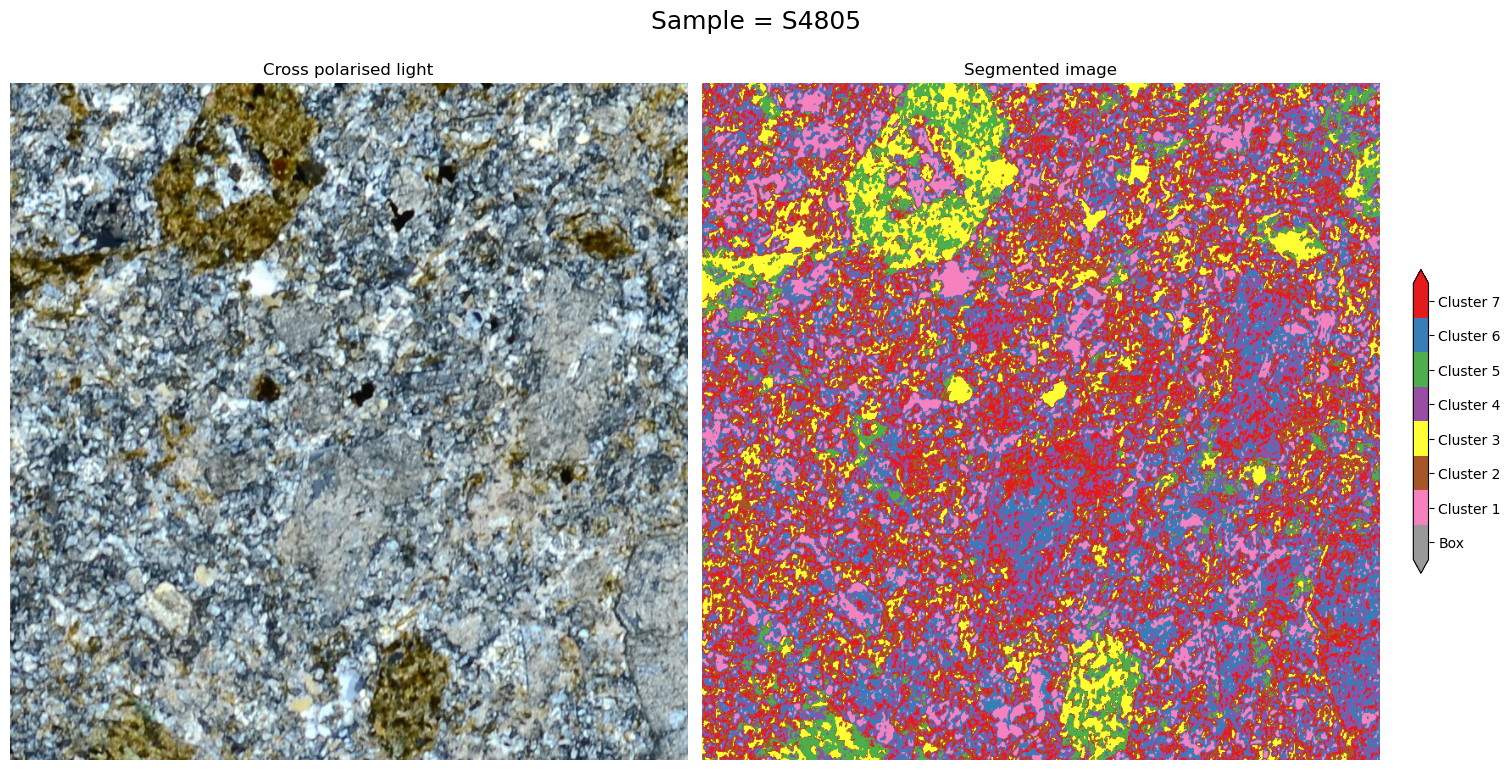

In [17]:
plot_kmeans_segmentation_results_zoomed (xpl_img, clust_img, clust_labels, sample_id)